In [71]:
import pandas as pd
import numpy as np
import csv
import gensim
import spacy
import re
import math
import nltk
import seaborn as sns
import en_core_web_sm
from spacy import displacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import regexp_tokenize
from nltk import sent_tokenize
from nltk.stem.porter import PorterStemmer
from scipy import sparse
nlp = en_core_web_sm.load()
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
import matplotlib.pyplot as plt


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jiezou/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/jiezou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jiezou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
#data=pd.read_csv('/Users/jiezou/Desktop/sjsu/256/project256/medical_conversation.txt')
#f= open('/Users/jiezou/Desktop/sjsu/256/project256/medical_conversation.txt',"r")
f= open('/Users/jiezou/Desktop/demo/self_make.txt',"r")
#f= open('/Users/jiezou/Desktop/sjsu/256/project256/cardiology1-very-difficult.txt',"r")

In [73]:
data0=f.read()
#df=pd.DataFrame(data)
#print(data)

In [74]:
#data.duplicated().sum()
#text1=str(data.iloc[0,0])

In [75]:
#print(text1)

In [76]:
#NLP
def remove_string_special_characters(s):
    stripped = re.sub('[^\w\s]','',s)
    stripped = re.sub('_', '',stripped)
    
    stripped = re.sub('\s+', '',stripped)
    stripped = stripped.strip()
    return stripped

In [77]:
def get_doc(sent):
    doc_info = []
    i = 0
    for sent in text_sents_clean:
        i +=1
        count = count_words(sent)
        temp = {'doc_id' : i, 'doc_length' : count}
        doc_info.append(temp)
    return doc_info

In [78]:
def count_words(sent):
    count = 0
    words = word_tokenize(sent)
    for word in words:
        count +=1
    return count

In [79]:
def create_freq_dict(sents):
    i=0
    freqDict_list = []
    for sent in sents:
        i += 1
        freq_dict = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            if word in freq_dict:
                freq_dict[word] += 1
            else:
                freq_dict[word] = 1
            temp = {'doc_id' : i, 'freq_dict': freq_dict}
        freqDict_list.append(temp)
    return freqDict_list

In [80]:
def computeTF(doc_info, freqDict_list):
    TF_scores = []
    for tempDict in freqDict_list:
        id = tempDict['doc_id']
        for k in tempDict['freq_dict']:
            temp = {'doc_id': id,
                   'TF_score': tempDict['freq_dict'][k]/doc_info[id-1]['doc_length'],
                   'key':k}
            TF_scores.append(temp)
        return TF_scores

In [81]:
def computeIDF(doc_info, freqDict_list):
    IDF_scores = []
    counter =0
    for dict in freqDict_list:
        counter += 1
        for k in dict['freq_dict'].keys():
            count = sum([k in tempDict['freq_dict'] for tempDict in freqDict_list])
            temp = {'doc_id': counter, 'IDF_score': math.log(len(doc_info)/count), 'key': k}
            IDF_scores.append(temp)
        return IDF_scores

In [82]:
def computeTFIDF(TF_scores, IDF_scores):
    TFIDF_scores = []
    for j in IDF_scores:
        for i in TF_scores:
            if j['key'] == i['key'] and j['doc_id'] == i['doc_id']:
                temp = {'doc_id': j['doc_id'],
                     'TFIDF_score': j['IDF_score']*i['TF_score'],
                     'key' : i['key']}
        TFIDF_scores.append(temp)
    return TFIDF_scores

In [83]:
text_sents = sent_tokenize(data0)
text_sents_clean = [remove_string_special_characters(s) for s in text_sents]
doc_info = get_doc(text_sents_clean)

In [84]:
freqDict_list = create_freq_dict(text_sents_clean)
TF_scores = computeTF(doc_info,freqDict_list)
IDF_scores= computeIDF(doc_info, freqDict_list)

In [85]:
doc_info

[{'doc_id': 1, 'doc_length': 1},
 {'doc_id': 2, 'doc_length': 1},
 {'doc_id': 3, 'doc_length': 1}]

In [86]:
np.char.lower(data0)

array("transcript: good morning. her friend gets office how may i help you hello i like to make an appointment to see dr frankie's please have you been to see doctor frankie before yes i have i had a physical last year find what's your name jason what's your phone number 714-688-4899 what's your date of birth january 21st 1992 what's your home address 1 washington square san jose thank you mr. jason let me pour out your file okay i have located your information what's the reason of you are making appointment i few not really good with my skin on the face do you need urgent care\ntranscript: good morning. our friend gustavus how many help you hello i like to make appointment to see dr frangas please have you been to see doctor frankie before yes i have i had a physical last year find what's your name jason what's your phone number 714-688-4899 what's your date of birth january 21st 1992 what's your home address 1 washington square san jose thank you mr. jason let me pour out your file o

In [87]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
data0 = data0.replace('Transcript', '')

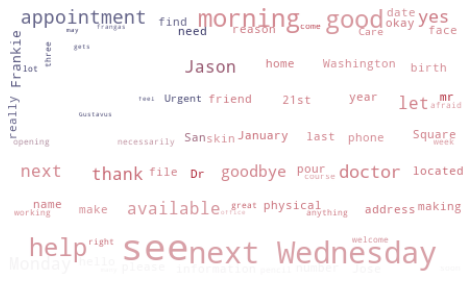

In [89]:
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

mask = np.array(Image.open(path.join(d, "/Users/jiezou/Desktop/demo/Screen.png"))) 

wordcloud_usa = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=100000, mask=mask).generate(data0)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,5])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

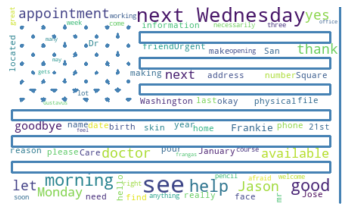

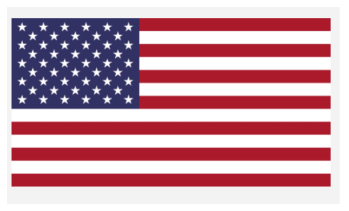

In [90]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = data0

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "/Users/jiezou/Desktop/demo/Screen.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

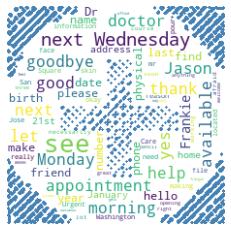

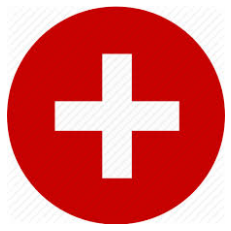

In [91]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = data0

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "plu.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

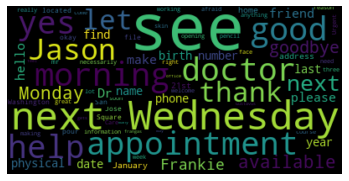

In [92]:
wordcloud = WordCloud().generate(data0)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

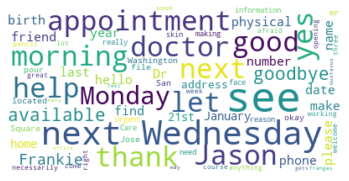

In [93]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(data0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [94]:
#oderlist function
def OderList(lists):
    lists = list(set(lists))
    ordered_tokens = set()
    result = []
    for word in lists:
        if word not in ordered_tokens:
            ordered_tokens.add(word)
            result.append(word)
    lists=" ".join(result)
    return result    

In [95]:
#using nltk to deal with text
def cleaning(text):
    import nltk   
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub('[a-zA-Z]+[0-9]$', " ", text)
    news = news.replace("-", "")
    # 2. Convert to lower case.
    news =  news.lower()
    #print("Convert to lower case:",news)
    # 3. Tokenize.
    #news_words = word_tokenize(news)
    news_words = regexp_tokenize(news, "[\w']+")
    #print("Tokenize:",news_words)   
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    #print(" Remove stop words:",words)
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    #print("Lemmentize",wordnet_lem)
    # 7. Stemming
    #stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    #print("Stemming",stems)
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    #sent=" ".join(stems)
    return wordnet_lem

In [96]:
# show all the words in coversation
#order all words
def order_tokens(words):
    ordered_tokens = set()
    result = []
    for word in words:
        if word not in result:
            ordered_tokens.add(word)
            result.append(word)
    return result

In [97]:
clean_word=cleaning(data0)

In [98]:
print(clean_word)

['good', 'morning', 'friend', 'get', 'office', 'may', 'help', 'hello', 'like', 'make', 'appointment', 'see', 'dr', "frankie's", 'please', 'see', 'doctor', 'frankie', 'yes', 'physical', 'last', 'year', 'find', "what's", 'name', 'jason', "what's", 'phone', 'number', '7146884899', "what's", 'date', 'birth', 'january', '21st', '1992', "what's", 'home', 'address', '1', 'washington', 'square', 'san', 'jose', 'thank', 'mr', 'jason', 'let', 'pour', 'file', 'okay', 'located', 'information', "what's", 'reason', 'making', 'appointment', 'really', 'good', 'skin', 'face', 'need', 'urgent', 'care', 'good', 'morning', 'friend', 'gustavus', 'many', 'help', 'hello', 'like', 'make', 'appointment', 'see', 'dr', 'frangas', 'please', 'see', 'doctor', 'frankie', 'yes', 'physical', 'last', 'year', 'find', "what's", 'name', 'jason', "what's", 'phone', 'number', '7146884899', "what's", 'date', 'birth', 'january', '21st', '1992', "what's", 'home', 'address', '1', 'washington', 'square', 'san', 'jose', 'thank', 

In [99]:
words_list=order_tokens(clean_word)
print(words_list)

['good', 'morning', 'friend', 'get', 'office', 'may', 'help', 'hello', 'like', 'make', 'appointment', 'see', 'dr', "frankie's", 'please', 'doctor', 'frankie', 'yes', 'physical', 'last', 'year', 'find', "what's", 'name', 'jason', 'phone', 'number', '7146884899', 'date', 'birth', 'january', '21st', '1992', 'home', 'address', '1', 'washington', 'square', 'san', 'jose', 'thank', 'mr', 'let', 'pour', 'file', 'okay', 'located', 'information', 'reason', 'making', 'really', 'skin', 'face', 'need', 'urgent', 'care', 'gustavus', 'many', 'frangas', "i've", 'feel', 'necessarily', 'soon', 'course', 'next', 'monday', "there's", 'lot', 'available', '10', "i'm", 'afraid', 'working', 'anything', '3', 'three', 'opening', 'wednesday', 'would', 'come', 'great', 'right', "i'll", 'pencil', 'welcome', "we'll", 'week', 'goodbye']


In [100]:
#merge words to clean_sent
clean_sent=" ".join(words_list)
print(clean_sent)

good morning friend get office may help hello like make appointment see dr frankie's please doctor frankie yes physical last year find what's name jason phone number 7146884899 date birth january 21st 1992 home address 1 washington square san jose thank mr let pour file okay located information reason making really skin face need urgent care gustavus many frangas i've feel necessarily soon course next monday there's lot available 10 i'm afraid working anything 3 three opening wednesday would come great right i'll pencil welcome we'll week goodbye


In [198]:
#Find Address
s = clean_sent
def FindAddress(strings):
    with open ('add.txt','w') as f:
        key = "address"
        if bool(key in strings)== True:
            index = strings.index(key)
            add=strings[index+len(key):index+len(key)+100]
            f.write(add)
            return add
        else:
            f.write('nothing')

In [199]:
add=FindAddress(s)
print(add)

 1 washington square san jose thank mr let pour file okay located information reason making really s


In [200]:
# get a set of places according to "add" using Google Places API
import requests, json

def Address_clean(strings):
    # enter your api key here
    api_key = 'XXXXXXX'
    # url variable store url
    url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"   
    # The text string on which to search 
    query = strings
    # get method of requests module
    # return response object
    r = requests.get(url + 'query=' + query +'&key=' + api_key)
    # json method of response object convert
    #  json format data into python format data
    x = r.json()
    # now x contains list of nested dictionaries
    # we know dictionary contain key value pair
    # store the value of result key in variable y
    y = x['results']
    # keep looping upto length of y
    #for i in range(len(y)):
    with open ('address.txt','w') as f:
        for i in range(len(y)):
            address = y[i]['formatted_address']
            f.write(address)
            return address

In [201]:
Address=Address_clean(add)
print(Address)

1 Washington Square, San Jose, CA 95112, USA


In [202]:
import re
#find the telephone number
def FindTelNum(strings):
    list1 = []
    list2 = []
    pattern = '[1-9]'
    r = re.compile(pattern)
    for i in strings:
        if r.match(i):
            list1.append(i)
        else:
            if len(list1) > len(list2):
                list2 = [i for i in list1]
            list1 = []
    if len(list1) > len(list2):
        return list1
    else:
        return list2

In [203]:
TelNum=FindTelNum(clean_sent)
TelNum="".join(TelNum)

In [204]:
print("TelNumber:",TelNum)

TelNumber: 7146884899


In [205]:
doc = nlp(clean_sent)
labels = [x.label_ for x in doc.ents]
print(labels)
Counter(labels)

['TIME', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'DATE', 'DATE', 'CARDINAL', 'GPE', 'GPE', 'PERSON', 'PERSON', 'DATE', 'CARDINAL', 'CARDINAL', 'DATE', 'DATE']


Counter({'TIME': 1, 'PERSON': 5, 'DATE': 6, 'CARDINAL': 3, 'GPE': 2})

In [206]:
print([(x, x.ent_iob_, x.ent_type_) for x in doc])

[(good, 'O', ''), (morning, 'B', 'TIME'), (friend, 'O', ''), (get, 'O', ''), (office, 'O', ''), (may, 'O', ''), (help, 'O', ''), (hello, 'O', ''), (like, 'O', ''), (make, 'O', ''), (appointment, 'O', ''), (see, 'O', ''), (dr, 'O', ''), (frankie, 'B', 'PERSON'), ('s, 'O', ''), (please, 'O', ''), (doctor, 'O', ''), (frankie, 'B', 'PERSON'), (yes, 'O', ''), (physical, 'O', ''), (last, 'B', 'DATE'), (year, 'I', 'DATE'), (find, 'O', ''), (what, 'O', ''), ('s, 'O', ''), (name, 'O', ''), (jason, 'B', 'PERSON'), (phone, 'O', ''), (number, 'O', ''), (7146884899, 'B', 'DATE'), (date, 'I', 'DATE'), (birth, 'I', 'DATE'), (january, 'B', 'DATE'), (21st, 'I', 'DATE'), (1992, 'I', 'DATE'), (home, 'O', ''), (address, 'O', ''), (1, 'B', 'CARDINAL'), (washington, 'B', 'GPE'), (square, 'O', ''), (san, 'B', 'GPE'), (jose, 'I', 'GPE'), (thank, 'O', ''), (mr, 'O', ''), (let, 'O', ''), (pour, 'B', 'PERSON'), (file, 'O', ''), (okay, 'O', ''), (located, 'O', ''), (information, 'O', ''), (reason, 'O', ''), (maki

In [207]:
#find time words
def FindTime(strings): 
    Time_list =[]
    for word in strings.ents:
        labels = word.label_    
        if labels == "DATE":
        #print(word)
            Time_list.append(str(word))        
    return Time_list   

In [236]:
time_words=FindTime(doc)
print("Date:",time_words)

Date: ['last year', '7146884899 date birth', 'january 21st 1992', 'next monday', 'wednesday', 'week']


In [240]:
type(time_words)

list

In [237]:
Time_ = ' '.join(time_words)
print(Time_)

last year 7146884899 date birth january 21st 1992 next monday wednesday week


In [242]:
def FormatDate(input_data):
    months = ['january','february','march','april','may','june','july','august','september','october','november','december']
    for x in input_data:
        for y in months:
            if x.find(y) == 0:
                return x
    return None

In [245]:
DOB_ = FormatDate(time_words)
print(DOB_)

january 21st 1992


In [210]:
#find the name words
def FindName1(strings): 
    Name_list =[]
    for word in strings.ents:
        labels = word.label_    
        if labels == "PERSON":
        #print(word)
           Name_list.append(str(word))        
    return Name_list   

In [211]:
Name_words=FindName1(doc)
print("Names:",Name_words)

Names: ['frankie', 'frankie', 'jason', 'pour', 'frangas']


In [214]:
type(time_words)

list

In [215]:
#find pations names
#Dictionary of all names
nltk.download('names')
from nltk.corpus import names
overall_name = ([name for name in names.words('male.txt')] + [name for name in names.words('female.txt')])

[nltk_data] Downloading package names to /Users/jiezou/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [216]:
#print(overall_name)

In [217]:
def Lower(strings):
    strings =" ".join(strings)
    strings = strings.lower()
    strings = re.sub('[a-zA-Z]+[0-9]$', " ", strings)
    strings = regexp_tokenize(strings, "[\w']+")
    return  strings

In [218]:
overall_name=Lower(overall_name)

In [219]:
#print(overall_name)

In [220]:
bool(Address)

True

In [278]:
#Dictionary of doctor names in the allover_names
# We can defined it from the HRM system of the hospital or using our user dataset(login_in_name)
doctor_names={'helen','bonny','frankie','brookes'} 

#Dictionary of time words in the allover_names
# We can defined it from finding time function
if bool(Address)==True:
    time_names = set(cleaning(Time_))
else:
    time_names={}
print(time_names) 

#print(time_names)

#Dictionary of address words in the allover_names
# We can defined it from finding address function
if bool(Address)==True:
    address_names =set(cleaning(Address))
else:
    address_names={}

print(address_names)

#other stopwords for PatientName
stops = set(nltk.corpus.stopwords.words("english")) 
other_stops ={'say','see'}

#Dictionary of name stopwords for patient 
PatientName_Stopwords=set.union(doctor_names,time_names,address_names,stops,other_stops)

print("PatientName_Stopwords:",PatientName_Stopwords)

{'next', 'monday', 'week', '1992', 'last', '7146884899', 'january', 'birth', 'wednesday', 'date', 'year', '21st'}
{'washington', 'san', 'jose', 'ca', 'usa', '95112', 'square', '1'}
PatientName_Stopwords: {'between', 'being', 'after', 'not', "shan't", 'didn', 'most', 'square', 'too', 'had', 'here', 'above', 'needn', 'washington', 'very', 'he', 'yours', 'or', 'yourselves', 'his', 'why', "that'll", 'shan', 'their', '1992', 'other', 'himself', 'we', 'it', "you're", 'nor', 'brookes', 'myself', 'hadn', 'who', 'an', 'having', "shouldn't", 'next', 'from', "didn't", 'him', 'if', 'mightn', 'once', "hasn't", 'o', 'more', '95112', 'don', 'that', 'your', "needn't", 'these', 'theirs', 'wasn', 'no', 'january', 'will', 'through', 'm', 'mustn', 'me', "won't", 'date', 'how', "don't", 'are', 'be', 'because', 'while', 'll', 'ma', 'any', 've', 'during', 'y', 'ain', 'wednesday', 'shouldn', 'at', "wasn't", 'them', 'as', 'hers', "you've", 'am', 'did', 'hasn', 'but', 'herself', 'see', 'san', 'couldn', 'she', '

In [258]:
def FindPatientName(strings):   
    Name_List = [w for w in  strings if w in overall_name]
    Name_List = [w for w in  Name_List if not w in PatientName_Stopwords]
    Name_List = list(set(Name_List))
    ordered_tokens = set()
    result = []
    for word in Name_List:
        if word not in ordered_tokens:
            ordered_tokens.add(word)
            result.append(word)
    Name=" ".join(result)
    return Name    

In [259]:
PatientName=FindPatientName(Name_words)

In [260]:
print("Name:", PatientName)

Name: jason


In [261]:
#find disease symptom words
#disease dictionary
disease_data=pd.read_csv('sym_3.csv')

In [262]:
print(disease_data.head(10))

   _id                     symptom
0    1        Upper abdominal pain
1    2        Lower abdominal pain
2    4               Alcohol abuse
3    5       Anxiety (Nervousness)
4    6            Arm ache or pain
5    7           Back ache or pain
6    8           Bleeding tendency
7    9              Blood in vomit
8   11  Pain or soreness of breast
9   13              Chest pressure


In [263]:
disease_data.symptom=disease_data.symptom.astype('str')

In [264]:
disease_data.dtypes

_id         int64
symptom    object
dtype: object

In [265]:
disease_list_all=" ".join(disease_data.symptom)

In [267]:
#print(disease_list_all)

In [268]:
disease_list=cleaning(disease_list_all)

In [269]:
#disease_list=OderList(disease_list)

In [270]:
#print(disease_list)

In [271]:
#function to find disease words in conversation
def FindDisease(strings):   
    Disease_List = [w for w in  strings if w in disease_list]
    Disease_List = [w for w in  Disease_List if not w in DiseaseList_Stopwords]
    Disease_List=OderList(Disease_List)
    Disease_List=" ".join(Disease_List)
    return Disease_List  

In [273]:
#other stopwords for DiseasesList
stops = set(nltk.corpus.stopwords.words("english")) 
other_stops2 ={'birth','middle','see','baby'}

#Dictionary of  stopwords for DiseaseList
DiseaseList_Stopwords=set.union(doctor_names,time_names,address_names,stops,other_stops2)

print(DiseaseList_Stopwords)

{'between', 'being', 'after', 'not', "shan't", 'baby', 'didn', 'most', 'square', 'too', 'had', 'here', 'above', 'needn', 'washington', 'very', 'he', 'middle', 'yours', 'or', 'yourselves', 'his', 'why', "that'll", 'shan', 'their', '1992', 'other', 'himself', 'we', 'it', "you're", 'nor', 'myself', 'hadn', 'who', 'an', 'having', "shouldn't", 'next', 'from', "didn't", 'him', 'if', 'mightn', 'once', "hasn't", 'o', 'more', '95112', 'don', 'that', 'your', "needn't", 'these', 'theirs', 'wasn', 'no', 'january', 'will', 'through', 'm', 'mustn', 'me', "won't", 'date', 'how', "don't", 'are', 'be', 'because', 'while', 'll', 'ma', 'any', 've', 'during', 'y', 'ain', 'wednesday', 'shouldn', 'at', "wasn't", 'them', 'as', 'hers', "you've", 'am', 'did', 'hasn', 'but', 'herself', 'see', 'san', 'couldn', 'she', 'each', 'in', 'than', 'ours', 'is', 'some', 'her', "wouldn't", 'aren', 'those', 'ca', 'below', 'there', 'bonny', '7146884899', "mustn't", 'just', 'our', 'they', 'then', "hadn't", 'was', 'last', 'isn

In [274]:
Disease_Sympto=FindDisease(clean_word)
print("Disease_Sympto:",Disease_Sympto)

Disease_Sympto: face skin


In [276]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Welcome to EHR!", ln=1, align="C")
pdf.cell(200, 10, txt="Name: "+PatientName, ln=1, align="L")
pdf.cell(200, 10, txt="Tel: "+TelNum, ln=1, align="L")
pdf.cell(200, 10, txt="Address:"+Address,  ln=1, align="L")
#pdf.cell(200, 10, txt="Name: ", ln=1, align="L")
pdf.cell(200, 10, txt="Date: " +Time_, ln=1, align="L")
pdf.cell(200, 10, txt="DOB: "  +DOB_, ln=1, align="L")
pdf.cell(200, 10, txt="Symptoms(Detected): "+Disease_Sympto, ln=1, align="L")
pdf.output("/Users/jiezou/Desktop/demo/simple_demo.pdf")

''

In [277]:
#try VSM
import string
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiezou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('en_core_web_sm')

doc1 = clean_sent
Symptos =disease_list_all
documents = [Symptos,doc1]

In [150]:
# Create the Document Term Matrix with tfidf
vocab= OderList(disease_list)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab,stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(tfidf_matrix.shape)
print(tfidf_matrix)

(2, 175)
  (0, 174)	0.0290913335025293
  (0, 172)	0.08727400050758789
  (0, 171)	0.0290913335025293
  (0, 170)	0.0290913335025293
  (0, 169)	0.0290913335025293
  (0, 168)	0.08727400050758789
  (0, 167)	0.0290913335025293
  (0, 166)	0.0290913335025293
  (0, 164)	0.0290913335025293
  (0, 163)	0.0290913335025293
  (0, 162)	0.0290913335025293
  (0, 161)	0.0290913335025293
  (0, 160)	0.0581826670050586
  (0, 159)	0.08727400050758789
  (0, 158)	0.0581826670050586
  (0, 157)	0.0290913335025293
  (0, 156)	0.290913335025293
  (0, 155)	0.0290913335025293
  (0, 154)	0.0581826670050586
  (0, 153)	0.0290913335025293
  (0, 152)	0.0290913335025293
  (0, 151)	0.0290913335025293
  (0, 150)	0.0290913335025293
  (0, 149)	0.0290913335025293
  (0, 148)	0.0290913335025293
  :	:
  (0, 25)	0.0290913335025293
  (0, 24)	0.0581826670050586
  (0, 23)	0.0290913335025293
  (0, 22)	0.0290913335025293
  (0, 21)	0.1163653340101172
  (0, 18)	0.0290913335025293
  (0, 17)	0.0290913335025293
  (0, 16)	0.0290913335025293
 

In [152]:
# Convert Sparse Matrix to Pandas Dataframe to see the word frequencies
doc_term_matrix = tfidf_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=tfidf_vectorizer.get_feature_names(), index=["Symptos","doc1"])
print(df)
df.to_csv('doc_term_matrix.csv',index=0)

         shoulder  gum    armpit   choking  vomiting      sore   unknown  \
Symptos  0.029091  0.0  0.029091  0.029091  0.058183  0.029091  0.029091   
doc1     0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

             baby  shortness   anxiety  ...  flash   urinate    origin  \
Symptos  0.029091   0.029091  0.029091  ...    0.0  0.029091  0.029091   
doc1     0.000000   0.000000  0.000000  ...    0.0  0.000000  0.000000   

             hand  inability      drug    breast     fever  tremor       fat  
Symptos  0.087274   0.029091  0.029091  0.029091  0.087274     0.0  0.029091  
doc1     0.000000   0.000000  0.000000  0.000000  0.000000     0.0  0.000000  

[2 rows x 175 columns]


In [153]:
# Compute Cosine Similarity
sim_s_d=cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
print("The cosine Similarity betweeen the documents and Symptos:\n")
df = pd.DataFrame(sim_s_d)
print(df)

The cosine Similarity betweeen the documents and Symptos:

     0         1
0  1.0  0.073181
